In [1]:
import torch
import sys
import os
import subprocess
sys.path.append(os.path.abspath("..")) 

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
print(f'Using device: {device}')

from dataloader.dataloader import load_MNIST_data
from train.training import train_nomal,train_for_DEQ
from train.evaluate import plot_loss_curve,plot_errorbar_losscurve,plot_confusion_matrix,plot_histograms,create_table,save_csv,auto_git_push,convergence_verify

Using device: cpu


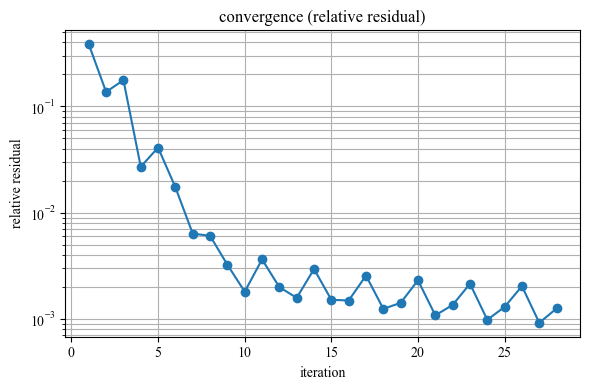

In [160]:
dataset = 'mnist'
data_train,data_test = load_MNIST_data()

batch_size = 64

enc_type = 'PM'
cls_type = 'MLP'

num_layer = 2 
fc ='relu'

loss_func = 'cross_entropy' 
optimizer = 'adam'
lr = 0.001

num_try = 5
max_epochs = 10
leverage = 8
kernel_size =4

folder = 'Class_MNIST_DEQ'
ex_name='PM_MLP00'

m=2
lam=1e-4
num_iter=30
tol=1e-5  #早期終了条件
beta=1.0

convergence_verify(dataset,num_iter,m,tol,beta,data_train,data_test,kernel_size,enc_type,leverage,device)  

1/5th Epoch:10/10(100.00%) 

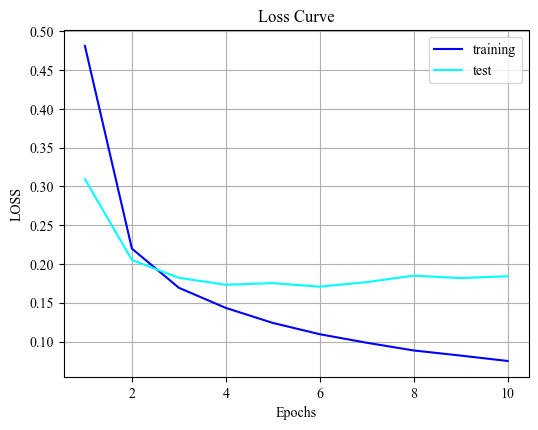

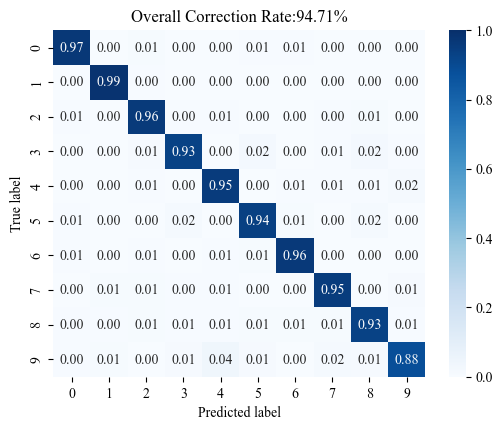

2/5th Epoch:10/10(100.00%) 

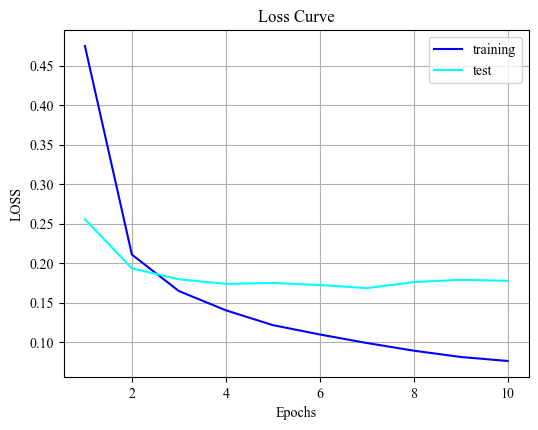

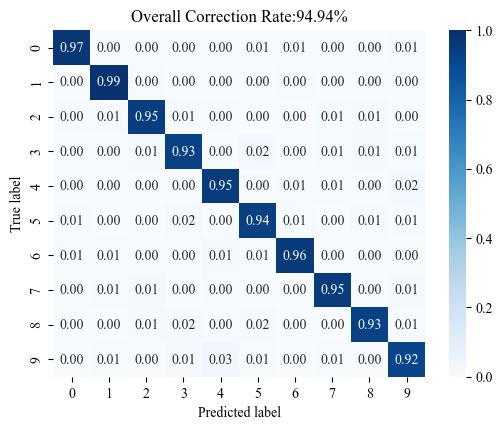

3/5th Epoch:10/10(100.00%) 

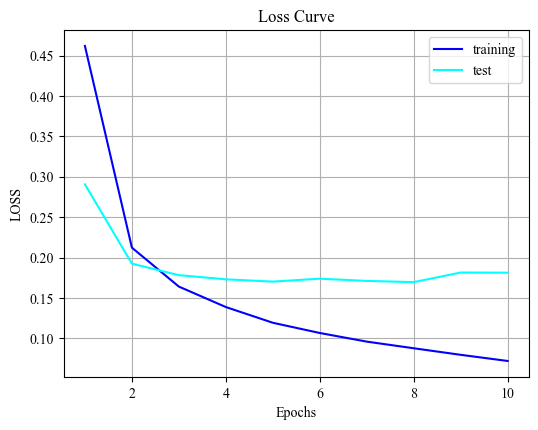

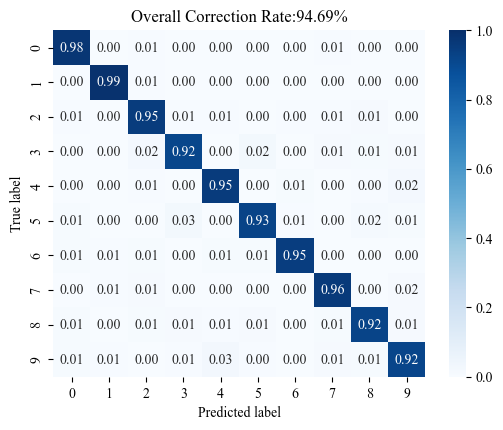

4/5th Epoch:10/10(100.00%) 

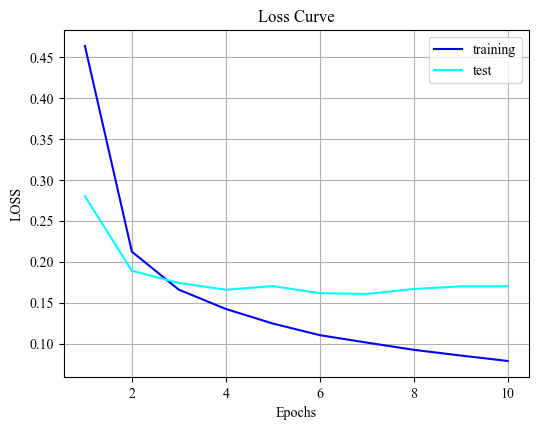

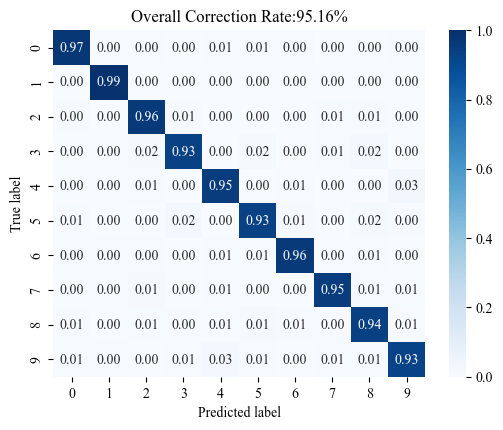

5/5th Epoch:10/10(100.00%) 

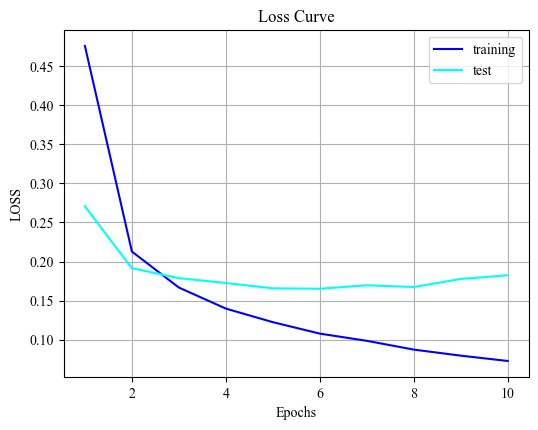

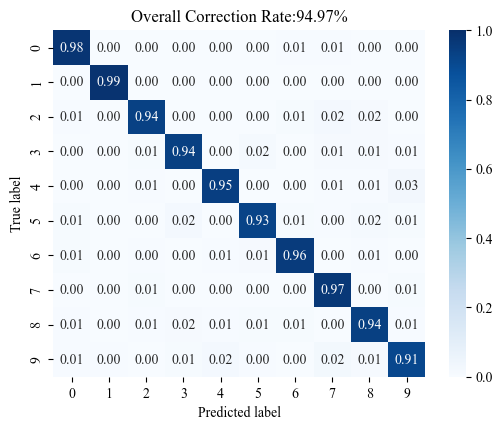

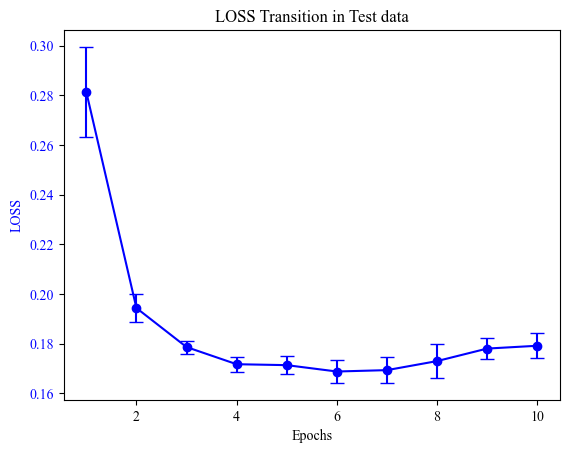

           Average  Best ID       Best  Worst ID      Worst
0   ACC  94.894000        4  95.160000         3  94.690000
1  LOSS   0.179173        4   0.170070         1   0.184252
2  TIME  67.914981       21  46.449939        49  98.501893
/Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_MNIST_DEQ
Saved at: /Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_MNIST_DEQ/PM_MLP00_6050625.csv


In [161]:
All_last_loss = []
All_loss_test = []
All_pro_time = []
All_test_acc = []
for num_times in range(num_try):

    loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_for_DEQ(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size,num_iter,m,tol,beta)

    All_loss_test.append(loss_test_)
    All_pro_time.append(pro_time_)
    All_last_loss.append(Last_loss_test)
    All_test_acc.append(Test_acc)

    plot_loss_curve(loss_train_,loss_test_)
    plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

plot_errorbar_losscurve(All_loss_test)
create_table(All_test_acc,All_last_loss,All_pro_time)
save_csv(folder,ex_name,All_loss_test)



1/5th Epoch:10/10(100.00%) 

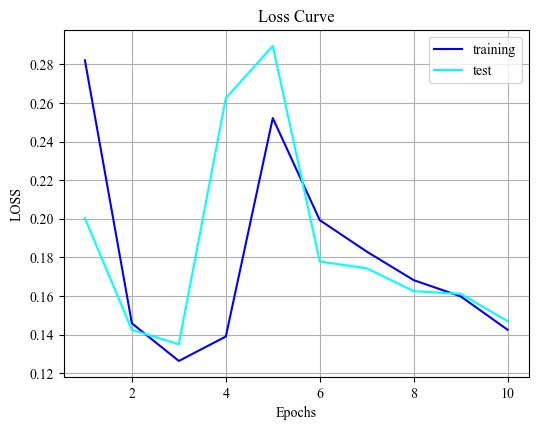

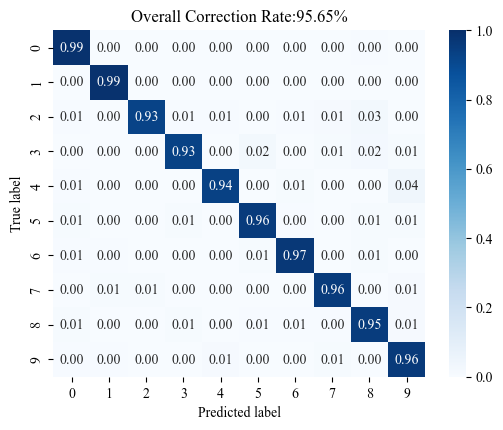

2/5th Epoch:2/10(79.10%)  

KeyboardInterrupt: 

In [31]:
leverage = 1
All_last_loss = []
All_loss_test = []
All_pro_time = []
All_test_acc = []
for num_times in range(num_try):

    loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_for_DEQ(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size,num_iter,m,tol,beta)

    All_loss_test.append(loss_test_)
    All_pro_time.append(pro_time_)
    All_last_loss.append(Last_loss_test)
    All_test_acc.append(Test_acc)

    plot_loss_curve(loss_train_,loss_test_)
    plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

plot_errorbar_losscurve(All_loss_test)
create_table(All_test_acc,All_last_loss,All_pro_time)
save_csv(folder,ex_name,All_loss_test)


1/5th Epoch:10/10(100.00%) 

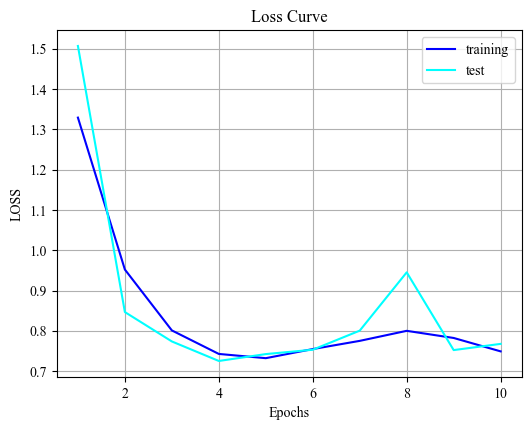

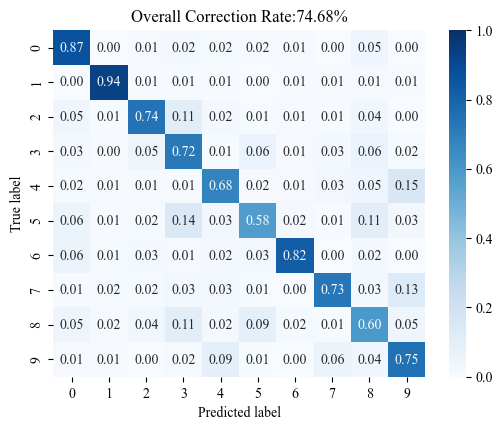

2/5th Epoch:10/10(100.00%) 

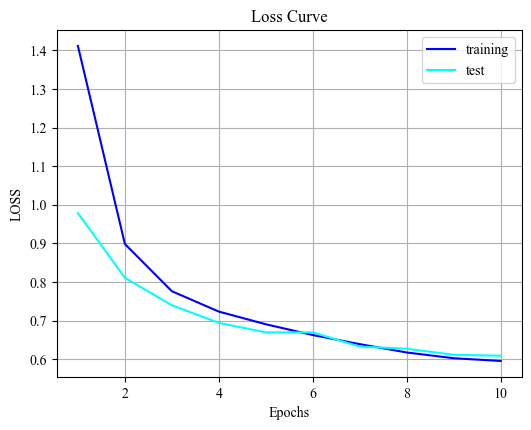

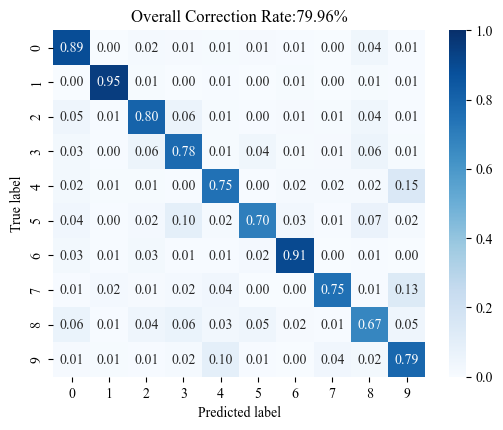

3/5th Epoch:10/10(100.00%) 

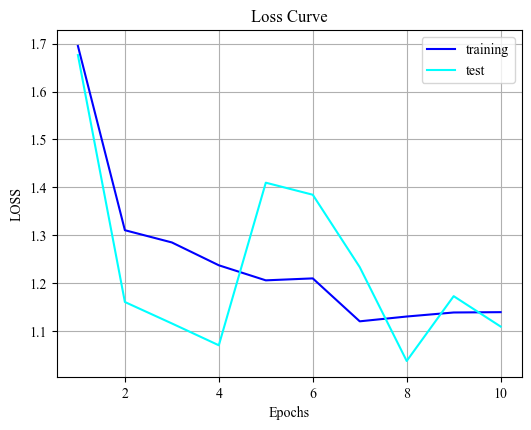

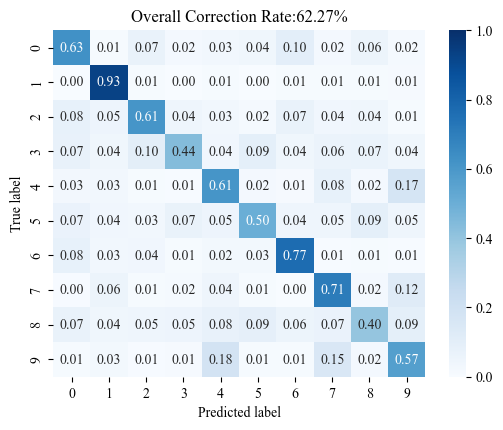

4/5th Epoch:10/10(100.00%) 

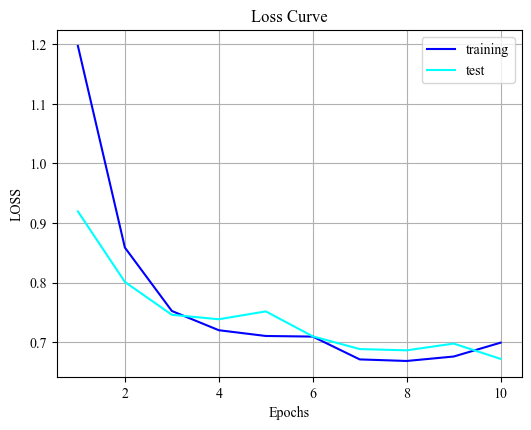

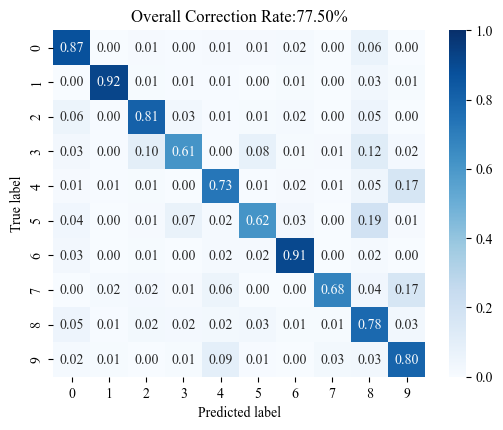

5/5th Epoch:10/10(100.00%) 

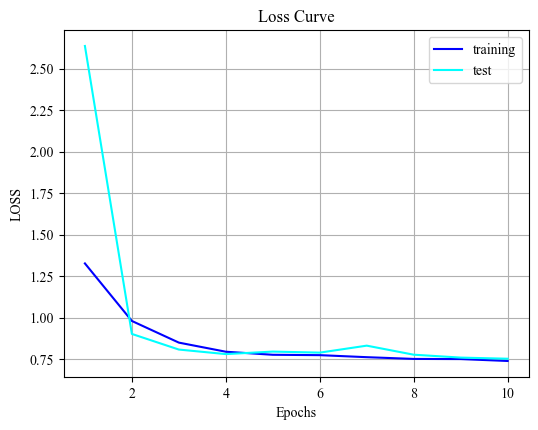

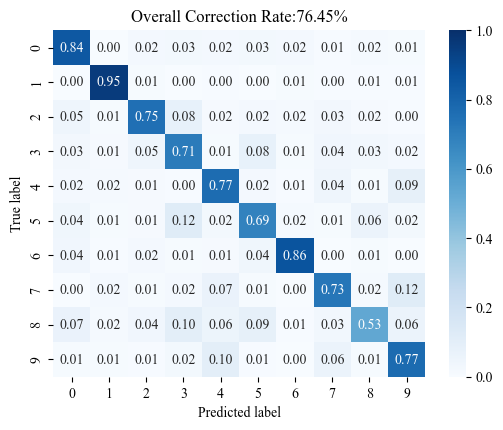

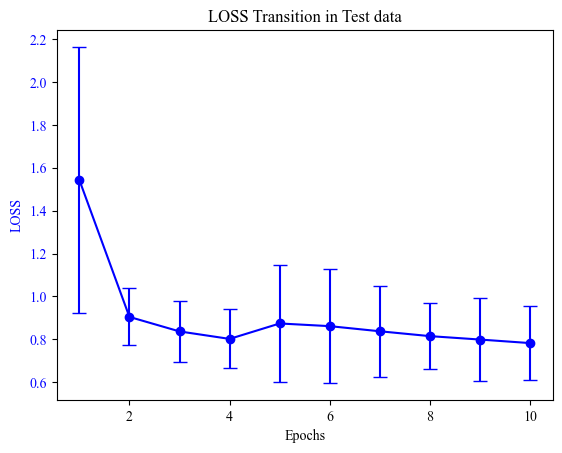

            Average  Best ID        Best  Worst ID       Worst
0   ACC   74.172000        2   79.960000         3   62.270000
1  LOSS    0.782023        2    0.609239         3    1.109825
2  TIME  317.809602       43  310.494524        30  334.557010
/Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_MNIST_DEQ
Saved at: /Users/konishi/Library/CloudStorage/OneDrive-個人用(2)/Codes/PhotonicEncoder_data/Class_MNIST_DEQ/PM_MLP00_6042012.csv


In [7]:
All_last_loss = []
All_loss_test = []
All_pro_time = []
All_test_acc = []
for num_times in range(num_try):

    loss_train_,loss_test_,pro_time_,Last_loss_test,Test_acc,all_labels,all_preds = train_for_DEQ(dataset,loss_func,optimizer,lr,num_times,num_try,data_train,data_test,batch_size,device,max_epochs,leverage,enc_type,cls_type,num_layer,fc,kernel_size,num_iter,m,tol,beta)

    All_loss_test.append(loss_test_)
    All_pro_time.append(pro_time_)
    All_last_loss.append(Last_loss_test)
    All_test_acc.append(Test_acc)

    plot_loss_curve(loss_train_,loss_test_)
    plot_confusion_matrix(all_labels,all_preds,dataset,Test_acc)

plot_errorbar_losscurve(All_loss_test)
create_table(All_test_acc,All_last_loss,All_pro_time)
save_csv(folder,ex_name,All_loss_test)

